### Read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

inputFileName = "Data_InventoryManagement.xlsx"
param_data = pd.read_excel(inputFileName, "Param", skiprows=0)
data = pd.read_excel(inputFileName, "Deterministic", skiprows=0)

### Set the data into list and dict, easier to manipulate

In [2]:
nbTimeSteps = param_data['Value'][0]
stockMax = param_data['Value'][1]
orderMax = param_data['Value'][2]
stockIni = param_data['Value'][3]
stockoutCost = param_data['Value'][4]

price = data['Price'].truncate(after=nbTimeSteps-1)
demand = data['Demand'].truncate(after=nbTimeSteps-1).astype(int)  #convert it as int


### Dynamic programming (deterministic)

Optimal value :  1202.0
Optimal trajectory :  [12.0, 35.0, 32.0, 7.0, 35.0, 8.0, 0.0]


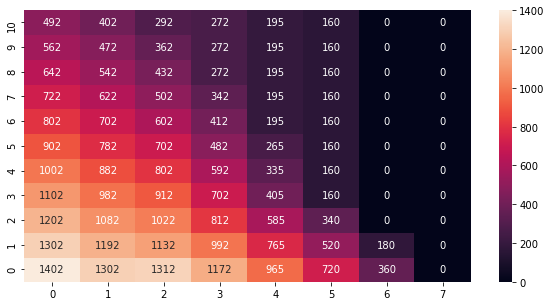

In [110]:
import numpy as np
import seaborn as sns 
from math import ceil


#WARNING : demand shall be integers

stockStep = 10
nbSteps = ceil(stockMax / stockStep)
stockGrid = [i * stockStep for i in range(nbSteps+1)]

#WARNING : stockIni shall correspond to a step of the grid


V = np.zeros(shape=(nbTimeSteps+1, nbSteps+1), dtype=np.float)  #V[nbTimeSteps][S] = 0.0, for any S
keepSolution = np.zeros(shape=(nbTimeSteps+1, nbSteps+1), dtype=np.float)
finalSolution = []  #the list of commands that are part of the optimal solution


#loop over the subproblems
#Reminder : subproblem[T,S] = min[t > T] price[t] x command[t] s.t. stockLevel[T] = S 
#           and stockLevel[t] = stockLevel[t-1] - demand[t] + command[t] >=0

for t in range(nbTimeSteps-1, -1, -1):  #loop from nbTimeSteps-1 to 0
    
    for iStockLevel, vStockLevel in enumerate(stockGrid):
        
        V[t,iStockLevel] = 100000 #initialize at +INF
                    
        #Bellman equation : 
        V[t, iStockLevel] = min_{feasible C} ( price[t] x C + V[T+1, S + C - demand[t]
        #TBC : compute V[t,iStockLevel] and keepSolution[t,iStockLevel]
        

        
#Starting from the initial problem pb(nbItems, capacity)
currentStock = stockIni
totalCost = 0.0
for t in range(nbTimeSteps):
    #TBC : compute finalSolution and totalCost



print("Optimal value : ", totalCost)
print("Optimal trajectory : ", finalSolution)

#Plot V as a heatmap
fig, ax = plt.subplots(figsize=(10,5)) #alter the figsize by passing a tuple showing the width & height parameters you would like to keep
sns.heatmap(V.transpose(), annot=True, fmt='.0f')  #display the Bellman value
ax.invert_yaxis()



### Stochastic dynamic programming (hazard-decision)

Optimal value :  3962.2143771370033


NameError: name 'plot' is not defined

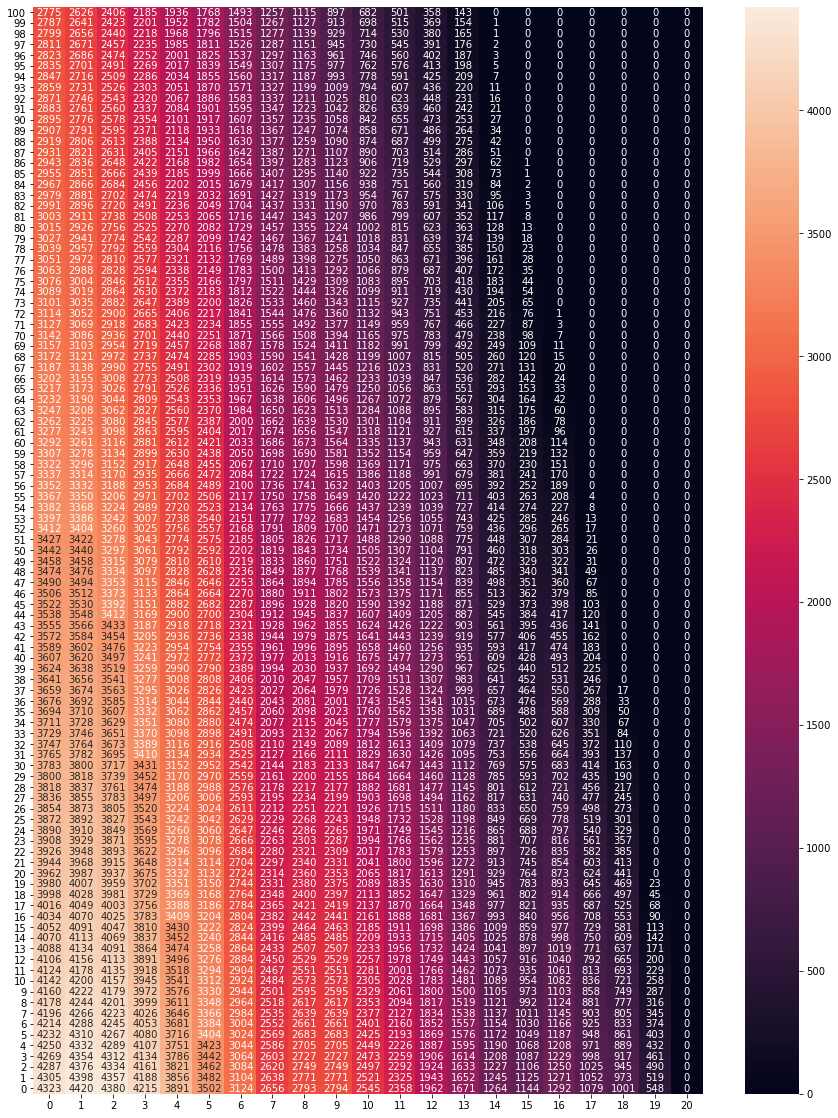

In [126]:
#Here we consider that we don't need to choose a unique order for the 3 scenarios
#WARNING : demand[iScenario][t] > stockStep, otherwise risk of having infeasibility : NONONONON


stockStep = 1
nbSteps = ceil(stockMax / stockStep)
stockGrid = [i * stockStep for i in range(nbSteps+1)]

#WARNING : stockIni shall correspond to a step of the grid
V = np.zeros(shape=(nbTimeSteps+1, nbSteps+1), dtype=np.float)  #V[nbTimeSteps][S] = 0.0, for any S


#Initialisation of V[nbTimeSteps-1,iStockLevel] : value the last quantity you need to buy
t = nbTimeSteps-1
for iStockLevel, vStockLevel in enumerate(stockGrid): 
    #TBC : compute V[t, iStockLevel] 
    
    

for t in range(nbTimeSteps-2, -1, -1):  #loop from nbTimeSteps-2 to 0           
    
    for iStockLevel, vStockLevel in enumerate(stockGrid): 
        
        V[t,iStockLevel] = 0.0

                    
        #Bellman equation : V[T, S] = Expected min_{feasible C} ([ price[t] x C + V[T+1, S + C - demand[t] ] )
        
        #TBC : compute V[t, iStockLevel] 

               
        
#Impossible in stochastic to determine the optimal trajectory
print("Optimal value : ", V[0, stockGrid.index(stockIni)])


#Plot V as a heatmap
fig, ax = plt.subplots(figsize=(15,20)) #alter the figsize by passing a tuple showing the width & height parameters you would like to keep
sns.heatmap(V.transpose(), annot=True, fmt='.0f')  #display the Bellman value
ax.invert_yaxis()




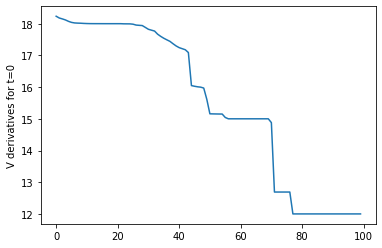

In [130]:
import matplotlib.pyplot as plt

#Plot the derivative of V for a given t
t = 0
dV = []
for iStockLevel, vStockLevel in enumerate(stockGrid):
    if iStockLevel > 0:
        dV.append(V[t, iStockLevel-1] - V[t, iStockLevel])
plt.plot(dV)
plt.ylabel('V derivatives for t=0')
plt.show()